## Fitting drug response curves with sigmoid function

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import os, sys
sys.path.insert(1, os.path.relpath("../functions"))
from fitting import *
from plotting import *


_FOLDER = "../data/"
_FOLDER_2 = "../figures/"
_FOLDER_3 = "../results/"

## Fitting data

In [2]:
df = pd.read_csv(_FOLDER_3+"filt_auc_06.csv")
conc_columns= ["fd_num_"+str(i) for i in range(10)]
response_norm = ['norm_cells_'+str(i) for i in range(10)]
df.columns

Index(['CELL_LINE_NAME', 'COSMIC_ID', 'DRUG_ID', 'DRUGID_COSMICID',
       'FOLD_DILUTION', 'MAX_CONC', 'fd_num_0', 'fd_num_1', 'fd_num_2',
       'fd_num_3', 'fd_num_4', 'fd_num_5', 'fd_num_6', 'fd_num_7', 'fd_num_8',
       'fd_num_9', 'norm_cells_0', 'norm_cells_1', 'norm_cells_2',
       'norm_cells_3', 'norm_cells_4', 'norm_cells_5', 'norm_cells_6',
       'norm_cells_7', 'norm_cells_8', 'norm_cells_9', 'drug_name', 'CCL_name',
       'auc', 'spearman_r', 'count_missing'],
      dtype='object')

### sigmoid_4_param

In [3]:
%%time
fitting_function = "sigmoid_4_param"
r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]>0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
print("Number of samples with fitting <0.1:", df[df[fitting_function+"_r2"]<0.1].shape[0])
print("")

100%|██████████| 41613/41613 [04:19<00:00, 160.16it/s]

<function sigmoid_4_param at 0x7fc8353d5ae8>
R2>0: (37878, 33)
R2>0.9 29763
Number of samples with fitting <0.1: 2606

CPU times: user 4min 6s, sys: 17.1 s, total: 4min 23s
Wall time: 4min 19s


Figures titles: Index_DRUG_ID_COSMIC_ID (COSMIC_ID is a cell line)


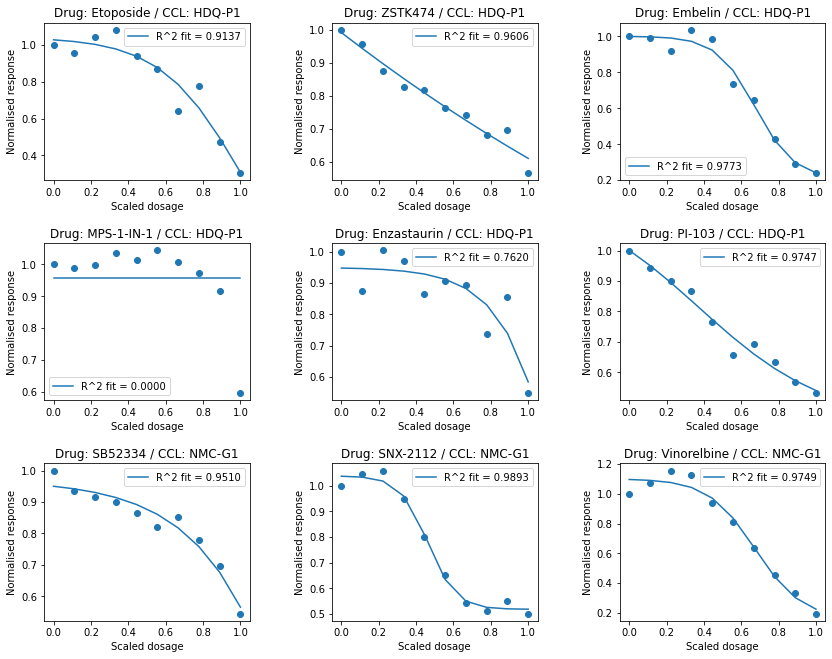

In [4]:
show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### sigmoid_2_param

100%|██████████| 37878/37878 [01:00<00:00, 628.74it/s]


<function sigmoid_2_param at 0x7fc8353d5730>
R2>0: (37878, 35)
R2>0.9 23196
Figures titles: Index_DRUG_ID_COSMIC_ID (COSMIC_ID is a cell line)
CPU times: user 59.3 s, sys: 2.26 s, total: 1min 1s
Wall time: 1min


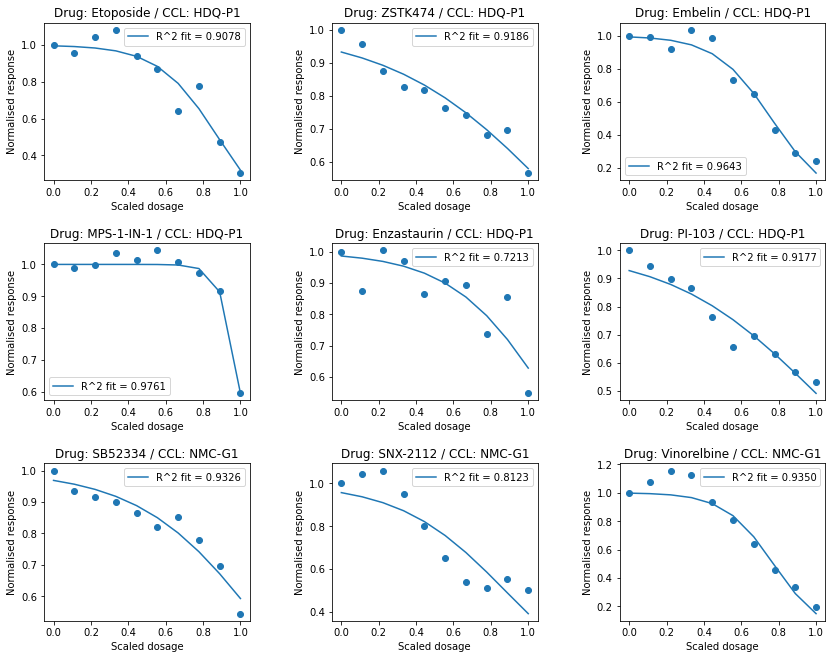

In [5]:
%%time
fitting_function = "sigmoid_2_param" 
# "sigmoid_Wang" we don't need default_param_number
r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### sigmoid_3_param

100%|██████████| 37878/37878 [02:40<00:00, 235.72it/s]


<function sigmoid_3_param at 0x7fc8353d5a60>
R2>0: (37869, 37)
R2>0.9 29265
Figures titles: Index_DRUG_ID_COSMIC_ID (COSMIC_ID is a cell line)
CPU times: user 2min 22s, sys: 7.58 s, total: 2min 29s
Wall time: 2min 42s


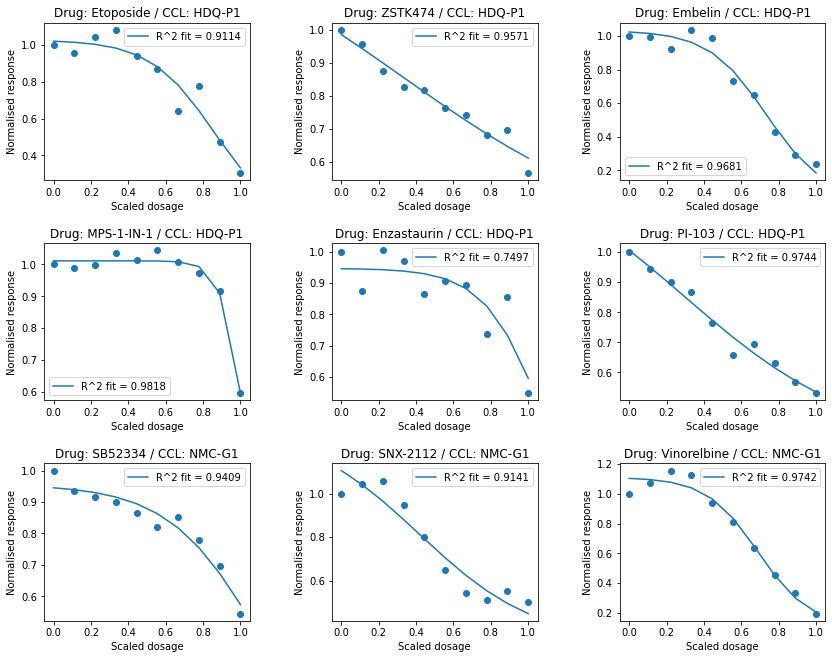

In [6]:
%%time
fitting_function = "sigmoid_3_param"

r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### fsigmoid

100%|██████████| 37869/37869 [01:52<00:00, 337.66it/s]


<function fsigmoid at 0x7fc8353d59d8>
(37869, 39)
Figures titles: Index_DRUG_ID_COSMIC_ID (COSMIC_ID is a cell line)


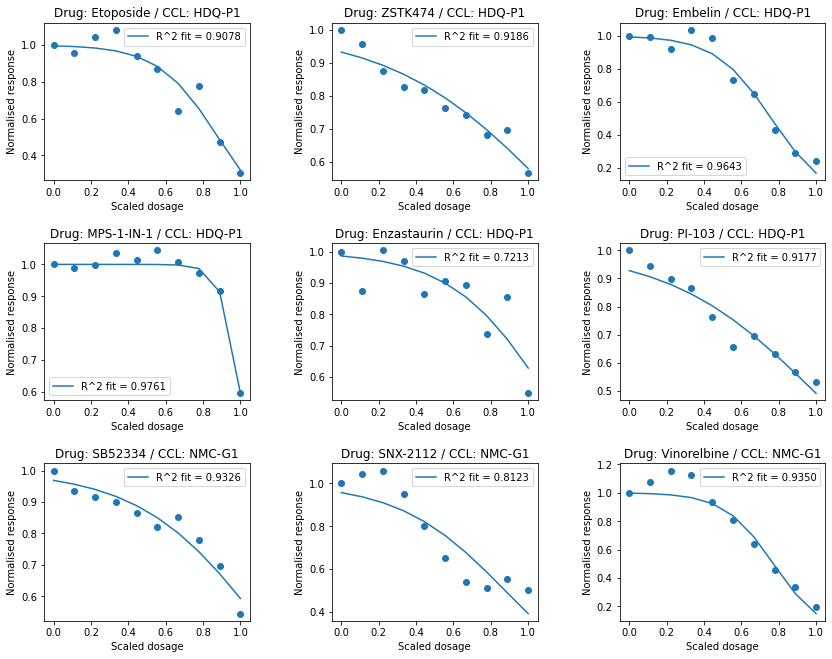

In [7]:
# %%time
fitting_function = "fsigmoid"

r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print(df.shape)

show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### logistic_4_param

100%|██████████| 37869/37869 [1:04:19<00:00,  9.81it/s]  


<function logistic_4_param at 0x7fc8353d5c80>
R2>0: (37858, 41)
R2>0.9 31891
Figures titles: Index_DRUG_ID_COSMIC_ID (COSMIC_ID is a cell line)
CPU times: user 2min 37s, sys: 10.3 s, total: 2min 47s
Wall time: 1h 4min 20s


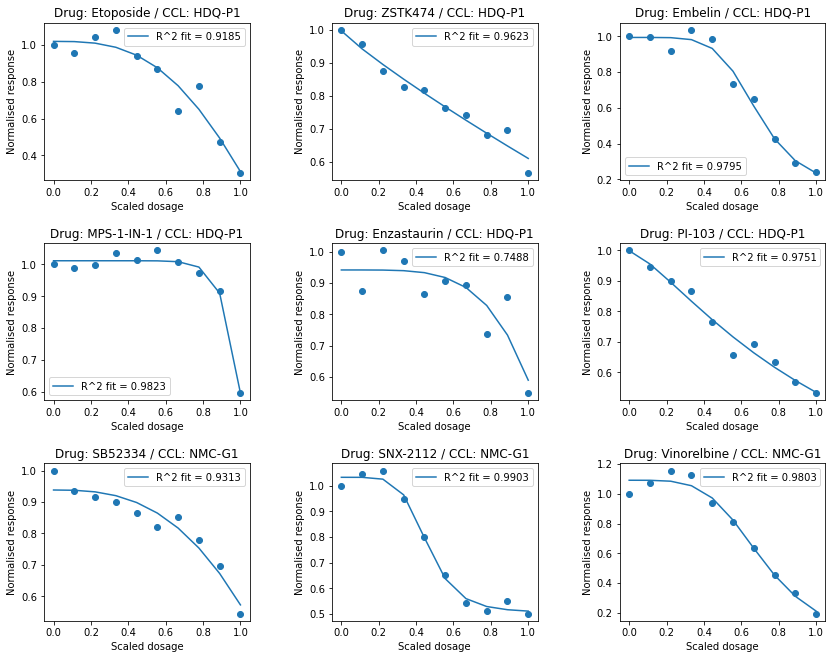

In [8]:
%%time
fitting_function = "logistic_4_param"
r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

In [9]:
df[df["logistic_4_param_r2"]>0.9][["logistic_4_param", "logistic_4_param_r2"]]

,logistic_4_param,logistic_4_param_r2
0,"[1.0201798828480437, 2.9899081457489403, 1.658...",0.918478
2,"[0.9973499243597909, 0.9055028327401946, 37.22...",0.962314
3,"[0.9939833004364438, 5.824692728616541, 0.6878...",0.979466
4,"[1.0115065667573797, 12.355781808700254, 1.241...",0.982325
6,"[0.998734436287935, 1.337928261035819, 1.12080...",0.975144
...,...,...
41608,"[0.9525198160474172, 5.139545231414677, 1.9749...",0.936438
41609,"[1.0092176349305548, 5.413084806585657, 0.5198...",0.957265
41610,"[0.9891000297990155, 6.335715623979788, 0.6912...",0.936859
41611,"[1.0262792117084372, 2.7060943366953523, 2.282...",0.970895


### LL4_4_param

100%|██████████| 37858/37858 [2:20:36<00:00,  4.49it/s]    


<function ll4_4_param at 0x7fc8353d5b70>
R2>0: (37855, 43)
R2>0.9 31884
Figures titles: Index_DRUG_ID_COSMIC_ID (COSMIC_ID is a cell line)
CPU times: user 2min 46s, sys: 9.69 s, total: 2min 56s
Wall time: 2h 20min 37s


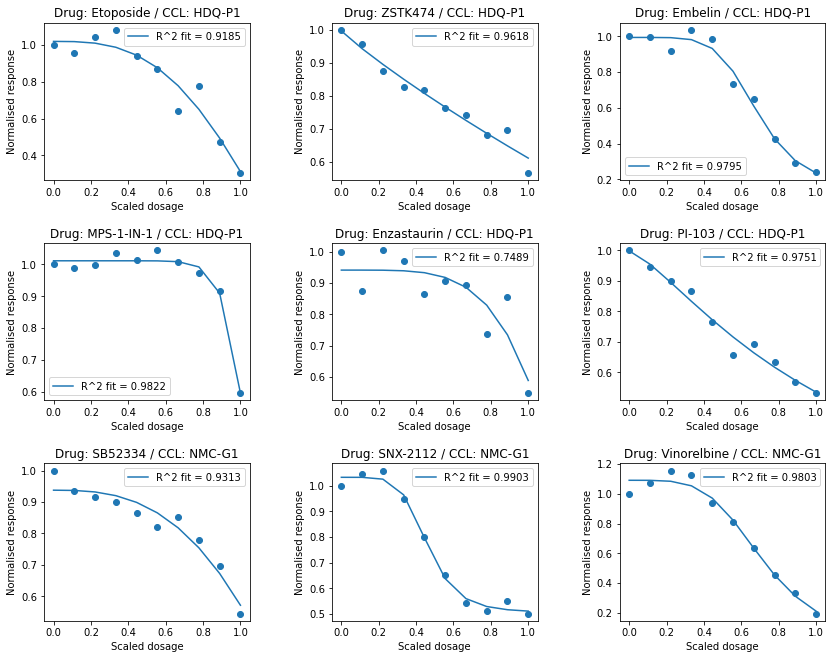

In [10]:
%%time
fitting_function = "ll4_4_param"
r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### ll4R_4_param

100%|██████████| 37855/37855 [4:02:38<00:00,  2.60it/s]    


<function ll4R_4_param at 0x7fc8353d5bf8>
R2>0: (37850, 45)
R2>0.9 31813
Figures titles: Index_DRUG_ID_COSMIC_ID (COSMIC_ID is a cell line)
CPU times: user 2min 36s, sys: 8.54 s, total: 2min 45s
Wall time: 4h 2min 39s


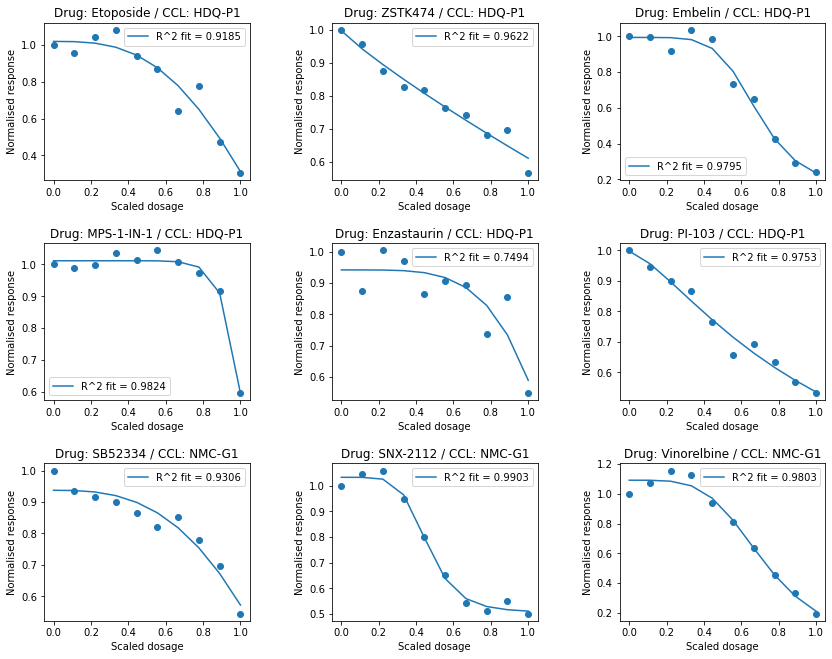

In [11]:
%%time
fitting_function = "ll4R_4_param"
r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### logLogist_3_param

100%|██████████| 37850/37850 [1:10:44<00:00,  8.92it/s]   


<function logLogist_3_param at 0x7fc8353d5d08>
R2>0: (37787, 47)
R2>0.9 30540
Figures titles: Index_DRUG_ID_COSMIC_ID (COSMIC_ID is a cell line)
CPU times: user 3min 21s, sys: 12.3 s, total: 3min 33s
Wall time: 1h 10min 45s


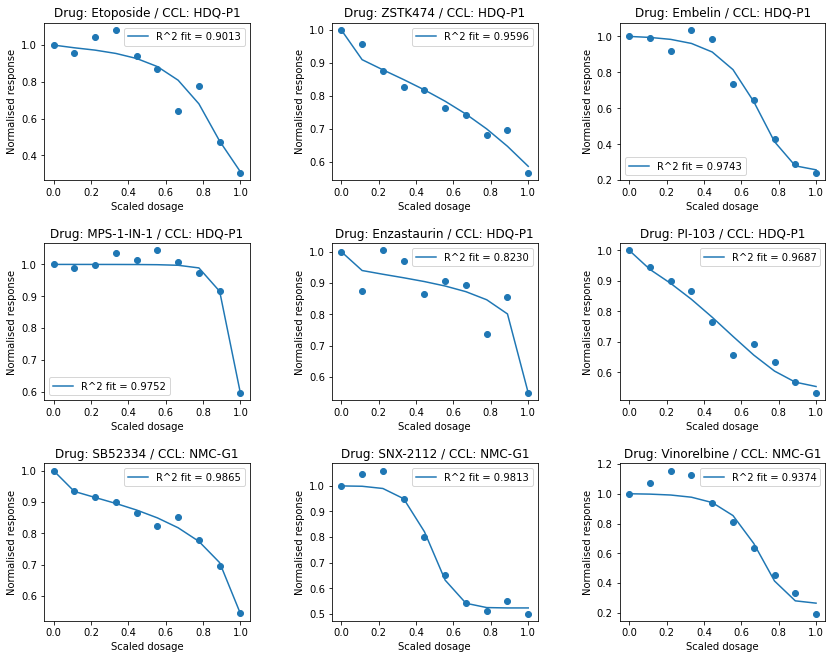

In [12]:
%%time
fitting_function = "logLogist_3_param"
r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

## Comparison of fitting models

In [13]:
functions = {"fsigmoid", 
             "sigmoid_2_param",
             "sigmoid_3_param",
             "sigmoid_4_param",
             "logistic_4_param",
            "ll4_4_param",
            "ll4R_4_param",
            "logLogist_3_param"}

functions_dict= dict(list(enumerate(functions)))
r2_columns = [fitting_function+"_r2" for fitting_function in functions]

In [14]:
df["better_fitting"] = np.argmax(df[r2_columns].values, axis=1)
r2_col_res = r2_columns +["better_fitting"]
df["better_fitting"] = df["better_fitting"].map(functions_dict)
df[r2_col_res].head()

,sigmoid_4_param_r2,sigmoid_2_param_r2,logLogist_3_param_r2,fsigmoid_r2,logistic_4_param_r2,ll4R_4_param_r2,sigmoid_3_param_r2,ll4_4_param_r2,better_fitting
0,9.136833e-01,0.907841,0.901337,0.907841,0.918478,0.918464,0.911393,0.918474,logistic_4_param
2,9.606089e-01,0.918633,0.959583,0.918633,0.962314,0.962231,0.957145,0.961816,logistic_4_param
3,9.773357e-01,0.964311,0.974261,0.964311,0.979466,0.979466,0.968081,0.979466,ll4_4_param
4,5.190941e-09,0.976109,0.975226,0.976109,0.982325,0.982378,0.981793,0.982214,ll4R_4_param
5,7.619705e-01,0.721291,0.823042,0.721291,0.748776,0.749391,0.749671,0.748863,logLogist_3_param


In [15]:
df["better_fitting"].value_counts()

logLogist_3_param    11783
sigmoid_4_param       9500
logistic_4_param      5619
ll4_4_param           5593
ll4R_4_param          4766
sigmoid_3_param        524
fsigmoid                 1
sigmoid_2_param          1
Name: better_fitting, dtype: int64

In [16]:
r2_limit = 0.98
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.98
ll4_4_param,13084
logistic_4_param,13078
ll4R_4_param,13033
sigmoid_4_param,12504
logLogist_3_param,11102
sigmoid_3_param,8191
fsigmoid,4971
sigmoid_2_param,4919


In [17]:
r2_limit = 0.95
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.95
logistic_4_param,24221
ll4_4_param,24221
ll4R_4_param,24160
sigmoid_4_param,22762
logLogist_3_param,22468
sigmoid_3_param,19313
fsigmoid,13590
sigmoid_2_param,13514


In [18]:
r2_limit = 0.9
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.9
logistic_4_param,31850
ll4_4_param,31846
ll4R_4_param,31782
logLogist_3_param,30540
sigmoid_4_param,29709
sigmoid_3_param,29240
fsigmoid,23243
sigmoid_2_param,23184


In [19]:
df.shape

(37787, 48)

In [20]:
df.to_csv(_FOLDER_3+"fit_auc_06.csv", index=False)